# Modelling practice with SVMs and Naive Bayes Classifiers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn import svm
from sklearn.model_selection import train_test_split
import math
from scipy import stats
rcParams['figure.figsize'] = 6, 4

## Linear SVM

Using the data in svm.csv, train a linear SVM (C=100000).

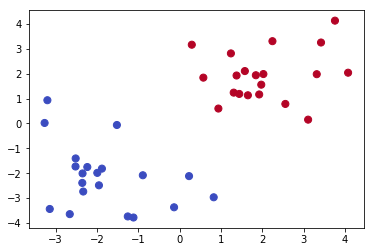

In [2]:
# Data and sample plot
data1=pd.read_csv('data/svm.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

#### a. Report the separating hyperplane (line).

In [3]:
clf = svm.SVC(kernel='linear',C=100000)  
clf.fit(X, Y)

SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [4]:
w = clf.coef_[0]
w

array([0.66329036, 0.56359437])

In [5]:
# Find the parameters for the hyperplane
a = -w[0] / w[1]
x1 = np.linspace(-3, 4)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

In [6]:
print("Separating hyperplane: x2 = " + str(round(a, 3)) + " * x1 - " + str(round((clf.intercept_[0])/w[1], 3)))

Separating hyperplane: x2 = -1.177 * x1 - 0.077


#### b. List the support vectors.

In [7]:
print(clf.support_vectors_)

[[ 0.22627536 -2.11810965]
 [-1.5180363  -0.06399383]
 [ 0.93564585  0.5969359 ]]


#### c. Calculate the upper and lower hyperplanes of the margin.

In [8]:
# Lower hyperplane
b_down = clf.support_vectors_[0]
x2_down = a * x1 + (b_down[1] - a * b_down[0])

In [9]:
# Upper hyperplane
b_up = clf.support_vectors_[-1]
x2_up = a * x1 + (b_up[1] - a * b_up[0])

In [10]:
print("Upper hyperplane: x2 = " + str(round(a, 3)) + " * x1 + " + str(round((b_up[1] - a * b_up[0]), 3)))
print("Lower hyperplane: x2 = " + str(round(a, 3)) + " * x1 + " + str(round((b_down[1] - a * b_down[0]), 3)))

Upper hyperplane: x2 = -1.177 * x1 + 1.698
Lower hyperplane: x2 = -1.177 * x1 + -1.852


#### d. Compute the width of the margin.

In [11]:
# Negative reciprocal coefficient
nrc = -1/a
# Set the negative reciprocal equal to the margin line and solve for x
unk_x = (-1*((clf.intercept_[0]) / w[1]) - (b_up[1] - a * b_up[0]))/(a-nrc)
# Then calculate y
unk_y = nrc * unk_x - (clf.intercept_[0]) / w[1]

In [12]:
y_diff = unk_y - (-1/a * 0 - (clf.intercept_[0]) / w[1])
dist = np.sqrt(unk_x**2 + y_diff**2)
print("Width of margin: " + str(round(dist, 3)))

Width of margin: 1.149


## Polynomial SVM

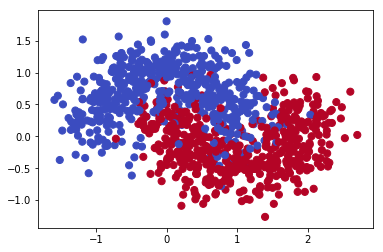

In [13]:
# Data 
data2=pd.read_csv('data/poly.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

#### a. Train a polynomial SVM using the training set.

In [14]:
clf = svm.SVC(kernel='poly') 
clf.fit(X, Y)

/nfshome/shb395/.conda/envs/myEnvp3/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
print("In sample, we successfully predict {}% of the data".format((round(100*(clf.predict(X_train)==Y_train).sum()/len(Y_train), 2))))
print("Out of sample, we successfully predict {}% of the data".format((round(100*(clf.predict(X_test)==Y_test).sum()/len(Y_test), 2))))

In sample, we successfully predict 84.0% of the data
Out of sample, we successfully predict 87.0% of the data


#### b. Use the validation subset to find the optimal parameters for the polynomial model (using models of degree 1, 2, 3, and 4). 

In [16]:
# Generate validation data
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

results_dict = {}
degrees = range(1,5)
for degree in degrees:
    C=[math.exp(i) for i in np.linspace(-10,2*degree,200)]
    OS_validation=[]
    for c in C:
        clf = svm.SVC(kernel='poly',degree=degree,C=c) 
        clf.fit(X_train_1, Y_train_1)
        correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) # OS score for validation set
        for_append = (c, correct)
        OS_validation.append(for_append)
    results_dict[degree] = OS_validation

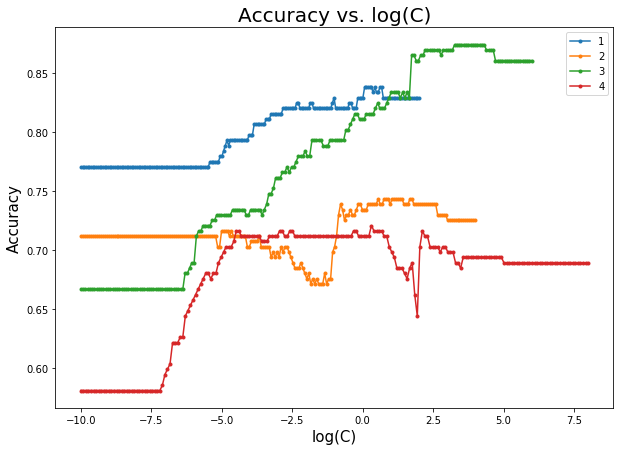

In [17]:
plt.figure(figsize=(10,7))
for k, v in results_dict.items():
    final_xs = []
    final_ys = []
    for pair in v:
        final_xs.append(pair[0])
        final_ys.append(pair[1])
    plt.plot(np.log(final_xs), final_ys, '.-', label=k)
plt.xlabel('log(C)', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('Accuracy vs. log(C)', fontsize=20)
plt.legend()
plt.show()

#### c. Choose the optimal degree and the optimal regularization constant C based on these graphs.  

Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected. 

In [18]:
max_dict = {}
for k, v in results_dict.items():
    accuracies = []
    for pair in v:
        accuracy = pair[1]
        accuracies.append(accuracy)
    max_value = max(accuracies)
    max_dict[k] = max_value

In [19]:
# Degrees and max accuracies
max_dict

{1: 0.8378378378378378,
 2: 0.7432432432432432,
 3: 0.8738738738738738,
 4: 0.7207207207207207}

In [20]:
# Then print out the best one
max_value = max(max_dict.values())
max_key = [k for k, v in max_dict.items() if v == max_value]

In [21]:
print("Degree with max accuracy: " + str(max_key[0]))
print("Max accuracy: " + str(max_value))

Degree with max accuracy: 3
Max accuracy: 0.873873873874


In [22]:
"""
Find the optimal C value

Note that I'm collecting a list of multiple C values since more than one C value resulted in the max accuracy 
of .874.
"""
optimal_cs = []
for k, v in results_dict.items():
    for pair in v:
        if pair[1] == max_value:
            optimal_cs.append(pair[0])

In [23]:
optimal_cs

[26.214997175778556,
 28.409786143837067,
 30.788328655030067,
 33.366009042478474,
 36.159499656402126,
 39.18686870032154,
 42.467697095591774,
 46.023205130144326,
 49.87638971059755,
 54.05217310547619,
 58.57756414160797,
 63.481832896308795,
 68.7967000152602,
 74.5565418805813]

In [24]:
# Find accuracies for models with degree 3 and all optimal Cs
OS_test=[]
for c in optimal_cs:
    clf = svm.SVC(kernel='poly',degree=3,C=c) 
    clf.fit(X_train_1, Y_train_1)
    correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test) # OS score for test set
    OS_test.append(correct)

In [25]:
# OS accuracy
print("OS accuracy for a poly SVM with degree 3 (and all values of C that resulted in max accuracy with the \
validation set): " + str(round(np.mean(OS_test), 3)))

OS accuracy for a poly SVM with degree 3 (and all values of C that resulted in max accuracy with the validation set): 0.886


## Probability by hand

Here's a sample dataset containing records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,no

SUV,red,domestic,no

SUV,red,imported,yes

SUV,yellow,imported,no

SUV,yellow,imported,yes

SUV,yellow,domestic,no

sports,yellow,imported,no

sports,red,imported,yes


### a) Calculate the following sample probabilities:

P(Yes) - 6/11

P(No) - 5/11

P(Red|Yes) - 5/6

P(SUV|Yes) - 1/3

P(Domestic|Yes) - 1/2

P(Red|No) - 2/5

P(SUV|No) - 3/5

P(Domestic|No) - 3/5

### b) Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen?

Prior (Stolen=Yes): 6/11

Prior (Stolen=No): 5/11

Total Likelihood (Red Domestic SUV | Yes): 5/6 x 1/3 x 1/2 = .139

Total Likelihood (Red Domestic SUV | No): 2/5 x 3/5 x 3/5 = .144

Unnormalized posterior (Yes): .139 x 6/11 = .076

Unnormalized posterior (No): .144 x 5/11 = .065

Sum of unnormalized posteriors: .076 + .065 = .141

Normalized posterior (Yes): .076 / .141 = .539

Normalized posterior (No): .065 / .141 = .461


## Gaussian Naive Bayes classification

Use eight factors to predict if people have diabetes or not. The variables are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)

### Using the data provided below, learn a Naive Bayes classifier from the training data:

In [26]:
# Training data
data_train=pd.read_csv("data/gnb_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("data/gnb_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

print(X_train.head())

   t_pre    glu  blood_p  triceps  serum   b_m  pedigree_f   age
0    3.0  158.0     64.0     13.0  387.0  31.2       0.295  24.0
1    0.0   84.0     64.0     22.0   66.0  35.8       0.545  21.0
2    9.0  120.0     72.0     22.0   56.0  20.8       0.733  48.0
3    4.0  110.0     76.0     20.0  100.0  28.4       0.118  27.0
4    2.0  100.0     66.0     20.0   90.0  32.9       0.867  28.0


#### a) Prediction accuracy for Naive Bayes

In [27]:
# Training a binary Gaussian Naive Bayes Classifier with real-valued input attributes.
# Assume that the binary output variable takes on values 0 or 1. 
def trainGaussianNaiveBayes(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_mu1'] = X_1[j].mean()
        nbc[j+'_sigma1'] = X_1[j].std()
        nbc[j+'_mu0'] = X_0[j].mean()
        nbc[j+'_sigma0'] = X_0[j].std()
    return nbc

def testGaussianNaiveBayes(X,nbc):
    y_pred = pd.Series(index=X.index)
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            pdf1 = stats.norm.pdf(thevalue,loc=nbc[j+'_mu1'],scale=nbc[j+'_sigma1'])
            pdf0 = stats.norm.pdf(thevalue,loc=nbc[j+'_mu0'],scale=nbc[j+'_sigma0'])
            y_pred[i] = y_pred[i]*pdf1/pdf0 if pdf0 > 0 else 1E10
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [28]:
naive_bayes_classifier = trainGaussianNaiveBayes(X_train,y_train)

y_pred_train = testGaussianNaiveBayes(X_train,naive_bayes_classifier)
y_pred_test = testGaussianNaiveBayes(X_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print('In sample prediction accuracy: {}',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train))
print('Out of sample prediction accuracy: {}',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test))

('In sample prediction accuracy: {}', 0.7627118644067796)
('Out of sample prediction accuracy: {}', 0.7911392405063291)


#### b) What is the prior probability of diabetes, learned from the training data?

In [29]:
for i,j in naive_bayes_classifier.items():
    if i == 'prior':
        print(i)
        print("{}%".format(round(j*100,2)))

prior
30.08%


#### c) What is the mean and variance of each input variable for patients with diabetes?

In [30]:
for i,j in naive_bayes_classifier.items():
    if i != 'prior' and '1' in i:
        print(i)
        print("{}%".format(round(j*100,2)))
        print("")

b_m_sigma1
625.85%

pedigree_f_sigma1
43.9%

age_mu1
3578.87%

glu_sigma1
3062.65%

serum_mu1
20921.13%

blood_p_mu1
7456.34%

serum_sigma1
12692.1%

t_pre_mu1
407.04%

b_m_mu1
3522.39%

blood_p_sigma1
1379.93%

t_pre_sigma1
351.86%

triceps_sigma1
976.27%

triceps_mu1
3347.89%

age_sigma1
1026.35%

glu_mu1
14414.08%

pedigree_f_mu1
63.9%



#### d) What is the mean and variance of each input variable for patients without diabetes?

In [31]:
# your code here
# your code here
for i,j in naive_bayes_classifier.items():
    if i != 'prior' and '0' in i:
        print(i)
        print("{}%".format(round(j*100,2)))
        print("")

b_m_sigma0
633.76%

pedigree_f_sigma0
29.18%

age_mu0
2839.39%

serum_mu0
12700.61%

blood_p_mu0
6920.61%

serum_sigma0
9148.61%

t_pre_mu0
269.09%

b_m_mu0
3170.91%

blood_p_sigma0
1171.33%

t_pre_sigma0
261.01%

triceps_sigma0
1043.69%

glu_sigma0
2469.19%

triceps_mu0
2720.0%

age_sigma0
853.74%

glu_mu0
11146.67%

pedigree_f_mu0
46.87%



## Predict using a Naive Bayes classifier

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [32]:
data_train=pd.read_csv("data/predict_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("data/predict_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("data/predict_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]

print(X_Labeled_train)
print("")
print(y_Labeled_train)

   0  1  2
0  4  6  6
1  2  2  2
2  2  6  2
3  6  6  6
4  1  2  2
5  3  4  4
6  6  1  6
7  1  3  1
8  5  1  6

0    0
1    1
2    0
3    0
4    1
5    0
6    0
7    1
8    1
Name: y, dtype: int64


#### a) Learn a discrete Naive Bayes classifier from  X_Labeled_train and use it to predict the labels of X_Labeled_test.

In [33]:
def trainNaiveBayesDiscrete(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_1'] = X_1[j].value_counts(normalize=True)
        nbc[j+'_0'] = X_0[j].value_counts(normalize=True)
    return nbc

def testNaiveBayesDiscrete(X,nbc):
    y_pred = pd.Series(index=X.index)
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            if thevalue not in nbc[j+'_1']:
                y_pred[i] = y_pred[i]*1E-3
            if thevalue not in nbc[j+'_0']:
                y_pred[i] = y_pred[i]*1E3
            if (thevalue in nbc[j+'_1']) & (thevalue in nbc[j+'_0']):
                y_pred[i] = y_pred[i]*(nbc[j+'_1'][thevalue]+1E-3)/(nbc[j+'_0'][thevalue]+1E-3)
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [34]:
naive_bayes_classifier = trainNaiveBayesDiscrete(X_Labeled_train,y_Labeled_train)

y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print('Out of sample prediction accuracy: {}',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))

('Out of sample prediction accuracy: {}', 0.6944444444444444)


#### b) Improve the classification by using the unlabeled data and the EM semi-supervised algorithm to predict the labels of X_Labeled_test.

In [35]:
def initializeNaiveBayesRandom(X_Unlabeled):
    nbc = {'prior':0.5}
    for j in X_Unlabeled.columns:
        thevalues = X_Unlabeled[j].unique()
        nbc[j+'_1'] = {}
        nbc[j+'_0'] = {}
        for jj in thevalues:
            nbc[j+'_1'][jj] = np.random.rand()
            nbc[j+'_0'][jj] = np.random.rand()
    return nbc
    
def EM(X_Labeled,y_Labeled,X_Unlabeled,num_iters):

    # initialize
    
    t = 0
    
    if len(y_Labeled) > 0:
        nbc = trainNaiveBayesDiscrete(X_Labeled,y_Labeled)
    else:
        nbc = initializeNaiveBayesRandom(X_Unlabeled)
    
    while True:
        t = t + 1
        print('Iteration',t,'of',num_iters)
        
        # E step - classify with nbc for unlabeled data only
        y_pred_Unlabeled = testNaiveBayesDiscrete(X_Unlabeled,nbc)
        
        # M step
        X_for_M_step = pd.concat([X_Labeled,X_Unlabeled], ignore_index=True) 
        y_for_M_step = pd.concat([y_Labeled,y_pred_Unlabeled], ignore_index=True)
        prior = 1.*y_for_M_step.sum()/y_for_M_step.count()
        nbc = {'prior':prior}
        for j in X_for_M_step.columns:
            nbc[j+'_1'] = {}
            nbc[j+'_0'] = {}
            for theindex in X_for_M_step.index:
                current_X = X_for_M_step.loc[theindex,j]
                current_y = y_for_M_step.loc[theindex]
                if current_X in nbc[j+'_1']:
                    nbc[j+'_1'][current_X] += current_y
                else:
                    nbc[j+'_1'][current_X] = current_y
                if current_X in nbc[j+'_0']:
                    nbc[j+'_0'][current_X] += (1.0-current_y)
                else:
                    nbc[j+'_0'][current_X] = 1.0-current_y
            # normalize probabilities
            tempsum = 0.0
            for k in nbc[j+'_1']:
                tempsum += nbc[j+'_1'][k]
            for k in nbc[j+'_1']:
                nbc[j+'_1'][k] /= tempsum
            tempsum = 0.0
            for k in nbc[j+'_0']:
                tempsum += nbc[j+'_0'][k]
            for k in nbc[j+'_0']:
                nbc[j+'_0'][k] /= tempsum            
                       
        if t==num_iters:
            break
            
    return nbc

In [36]:
naive_bayes_classifier=EM(X_Labeled_train,y_Labeled_train,X_Unlabeled_train,num_iters=15)

y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print('Out of sample prediction accuracy: {}%'.format(round(100.0*sum((y_pred_test>0.5) == \
                                                             y_Labeled_test)/len(y_Labeled_test), 2)))

('Iteration', 1, 'of', 15)
('Iteration', 2, 'of', 15)
('Iteration', 3, 'of', 15)
('Iteration', 4, 'of', 15)
('Iteration', 5, 'of', 15)
('Iteration', 6, 'of', 15)
('Iteration', 7, 'of', 15)
('Iteration', 8, 'of', 15)
('Iteration', 9, 'of', 15)
('Iteration', 10, 'of', 15)
('Iteration', 11, 'of', 15)
('Iteration', 12, 'of', 15)
('Iteration', 13, 'of', 15)
('Iteration', 14, 'of', 15)
('Iteration', 15, 'of', 15)
Out of sample prediction accuracy: 94.44%
